In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow', 'utils'))

In [3]:
%matplotlib inline

import itertools
from sessions_nMAP_EV_SU import selected
from imports import *

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [23]:
#source = '/home/sobolev/nevermind_ag-grothe/AG_Pecka/data/processed/'
source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'
rep_path = '/home/sobolev/nevermind/Andrey/analysis/manuscripts/'

In [27]:
#all_selected = []
#for animal, s_list in selected.items():
#    all_selected += s_list
#
#all_selected[:7], len(all_selected)

all_selected = selected['57']
all_selected

['57_SIT_2023-12-22_14-08-07',
 '57_SIT_2023-12-22_14-43-58',
 '57_SIT_2023-12-22_17-37-18',
 '57_SIT_2023-12-23_14-21-01',
 '57_SIT_2023-12-28_16-43-28',
 '57_SIT_2023-12-29_11-06-26',
 '57_SIT_2023-12-29_11-40-14',
 '57_SIT_2024-01-02_14-43-18',
 '57_SIT_2024-01-02_16-38-05',
 '57_SIT_2024-01-02_17-10-09',
 '57_SIT_2024-01-03_19-22-18',
 '57_SIT_2024-01-03_19-54-59',
 '57_SIT_2024-01-04_14-16-22',
 '57_SIT_2024-01-04_14-52-59',
 '57_SIT_2024-01-05_14-35-49',
 '57_SIT_2024-01-06_16-52-40',
 '57_SIT_2024-01-06_17-25-35',
 '57_SIT_2024-01-07_19-23-28',
 '57_SIT_2024-01-08_15-51-26',
 '57_SIT_2024-01-12_13-23-02',
 '57_SIT_2024-01-15_13-45-22',
 '57_SIT_2024-01-15_14-34-48']

## Performance - chance, multi-session

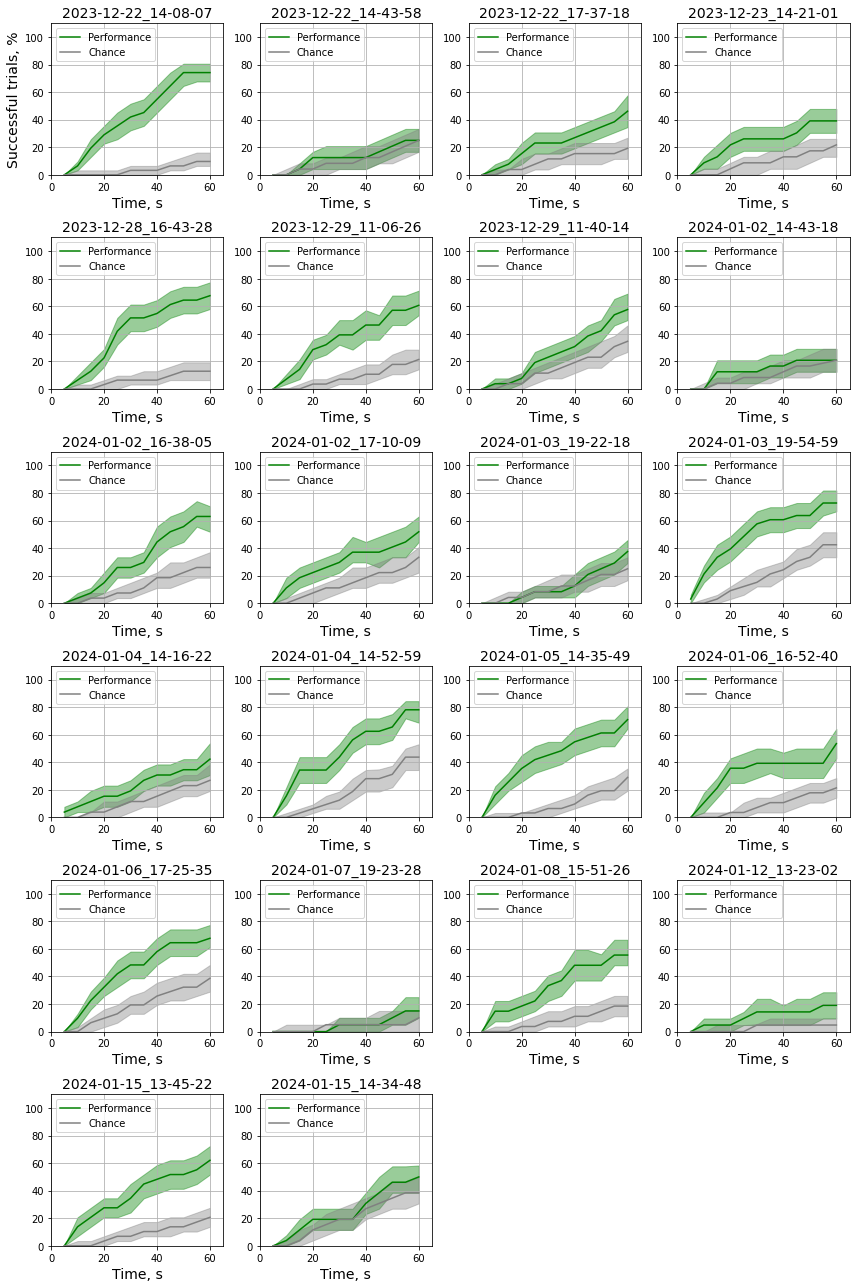

In [28]:
n_cols = 4
n_rows = 1 + int(len(all_selected) / n_cols)
clrs = ['green', 'grey']

fig = plt.figure(figsize=(3 * n_cols, 3 * n_rows))

for i, session in enumerate(all_selected):
    animal   = session.split('_')[0]
    session_path = os.path.join(source, animal, session)
    h5name = os.path.join(session_path, 'performance.h5')
    
    with h5py.File(h5name, 'r') as f:
        perf = np.array(f['performance'])
        correct = float(np.array(f['proportion_correct']))
        x = perf[:, 6]
        
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.plot(x, perf[:, 0], color=clrs[0], label='Performance')  # performance
    ax.plot(x, perf[:, 3], color=clrs[1], label='Chance')  # chance
    ax.fill_between(x, perf[:, 0] + perf[:, 1], perf[:, 0] + perf[:, 2], alpha=0.4, color=clrs[0])
    ax.fill_between(x, perf[:, 3] + perf[:, 4], perf[:, 3] + perf[:, 5], alpha=0.4, color=clrs[1])
    ax.set_ylim(0, 110)
    ax.set_xlim(0, 65)
    ax.grid()
    ax.set_title(session[-19:], fontsize=14)
    ax.set_xlabel('Time, s', fontsize=14)
    ax.legend(loc='upper left')
    
    if i == 0:
        ax.set_ylabel('Successful trials, %', fontsize=14)
        
fig.tight_layout()

## Performance - proportion correct

In [38]:
animals = list(set([session.split('_')[0] for session in all_selected]))
animals

['009266', '009265', '57', '013829']

In [29]:
all_selected = []
for animal, s_list in selected.items():
    all_selected += s_list

all_selected[:7], len(all_selected)

(['009266_hippoSIT_2023-04-17_17-04-17',
  '009266_hippoSIT_2023-04-18_10-10-37',
  '009266_hippoSIT_2023-04-18_17-03-10',
  '009266_hippoSIT_2023-04-19_10-33-51',
  '009266_hippoSIT_2023-04-20_08-57-39',
  '009266_hippoSIT_2023-04-21_08-43-00',
  '009266_hippoSIT_2023-04-21_13-12-31'],
 65)

In [59]:
data = []

for i, session in enumerate(all_selected):
    animal   = session.split('_')[0]
    session_path = os.path.join(source, animal, session)
    h5name = os.path.join(session_path, 'performance.h5')
    
    with h5py.File(h5name, 'r') as f:
        perf = np.array(f['performance'])
        corr = float(np.array(f['proportion_correct']))
        
    data.append([
        animals.index(animal),  # animal ID
        corr,  # proportion correct
        (perf[:, 0] + perf[:, 1] - perf[:, 3])[-1],  # lower CI
        (perf[:, 0] - perf[:, 3])[-1]   # median
    ])
    
data = np.array(data)

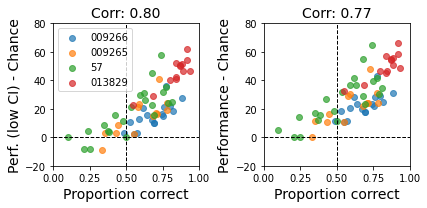

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))


c1 = np.corrcoef(data[:, 1], data[:, 2])[0][1]
c2 = np.corrcoef(data[:, 1], data[:, 3])[0][1]
c3 = np.corrcoef(data[:, 3], data[:, 2])[0][1]


for animal_id in np.unique(data[:, 0]):
    ds = data[data[:, 0] == animal_id]
    axes[0].scatter(ds[:, 1], ds[:, 2], label=animals[int(animal_id)], alpha=0.7)
    axes[0].set_xlabel('Proportion correct', fontsize=14)
    axes[0].set_ylabel('Perf. (low CI) - Chance', fontsize=14)
    axes[0].set_title(f"Corr: {c1:.2f}", fontsize=14)
    
    axes[1].scatter(ds[:, 1], ds[:, 3], label=animals[int(animal_id)], alpha=0.7)
    axes[1].set_xlabel('Proportion correct', fontsize=14)
    axes[1].set_ylabel('Performance - Chance', fontsize=14)
    axes[1].set_title(f"Corr: {c2:.2f}", fontsize=14)

#     axes[2].scatter(ds[:, 3], ds[:, 2], label=animals[int(animal_id)], alpha=0.7)
#     axes[2].set_xlabel('Performance median', fontsize=14)
#     axes[2].set_ylabel('Performance lower CI', fontsize=14)
#     axes[2].set_xlim(0, 100)
#     axes[2].set_ylim(0, 100)
#     axes[2].set_title(f"Corr: {c3:.2f}", fontsize=14)

for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_ylim(-20, 80)
    ax.axhline(0, ls='--', lw=1, color='black')
    ax.axvline(0.5, ls='--', lw=1, color='black')

axes[0].legend()
fig.tight_layout()
fig.savefig(os.path.join(rep_path, 'performance_prop-correct.png'), dpi=300)